In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# read Datset
df = pd.read_csv("Cleaned_data.csv")

In [4]:
# target and feature split
X = df.drop(columns=['Label']) 
y = df['Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Build the model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    158532
           1       0.99      0.99      0.99    370542

    accuracy                           0.99    529074
   macro avg       0.99      0.98      0.98    529074
weighted avg       0.99      0.99      0.99    529074



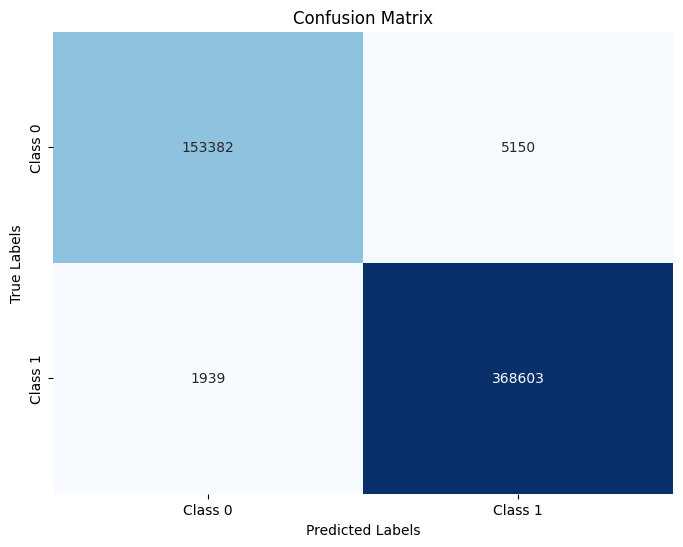

In [16]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# saving the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)